# Exploring the regional response to a warmer world

This notebook allows you to explore the regional response to a warmer world at a series of global **warming levels** (changes in global mean temperature relative to the historical baseline): 1.5˚, 2˚, 3˚, and 4˚C. Warming levels can be used to explore future possible trajectories of any climate variable of interest for a given increase in global mean temperature.

Because warming levels are defined based on amount of global mean temperature change, they can be used to compare possible outcomes across multiple scenarios or model simulations. Warming levels are often used in international policy discussions, such as the [Paris Agreement](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement) to limit warming to 2˚C.

For a given warming level, we will then use this tool to:
- Examine the range of possibility in maps of regional changes across climate models
- Map day-of-year/time-of-day combinations with especially large increases in temperature, and overlay the locations of power plants to help identify vulnerable assets

**Intended Application**: As a user, I want to **<span style="color:#FF0000">apply a global warming levels approach to understand the regional response</span>**:
1. Visualize and compare the difference in the regional response across models at a selected warming level
2. Extract model data at a warming level for my specific application needs

If you're interested in learning more about the new Global Warming Levels framework versus the traditional SSP framework for warming, please check out our `warming_levels_approach.ipynb` located on the tab to your left! It will also be in the tools folder in your `cae-notebooks` directory.

**Runtime**: With the default settings, this notebook takes approximately **20 minutes** to run from start to finish. Modifications to selections may increase the runtime.

## Step 0: Setup
Import libraries needed for analysis.

In [1]:
import climakitae as ck
from climakitaegui.explore import warming_levels

## Step 1: Explore data

#### 1a) Select data of interest

We recommend selecting the coarsest time-scale available (i.e., monthly) for the visualization, unless you plan to export the data at a higher time-resolution.

Card(collapsible=False, styles={'header_background': 'lig...}, title='Choose Data t..., width=600)
    [0] Column
        [0] Row
            [0] Column(width=270)
                [0] StaticText(name='Downscaling Method')
                [1] RadioBoxGroup(name='Downscaling method', options=OrderedDict({'Dynamical': ...]), value='Dynamical')
            [1] Column(width=120)
                [0] StaticText(styles={'color': 'red'})
        [1] Row
            [0] Column(width=250)
                [0] StaticText(name='Variable Type')
                [1] Select(options=OrderedDict({'Air Temperat...]), value='Air Temperature at 2m', width=225)
                [2] StaticText(value='Temperature o...)
                [3] StaticText(name='Variable Units')
                [4] RadioBoxGroup(name='Units', options=OrderedDict({'K': 'K', ...]), value='K')
                [5] StaticText(name='Timescale')
                [6] RadioBoxGroup(options=OrderedDict({'daily': 'dai...]), value='monthly')
                [7] StaticText(name='Model Grid-Spacing')
                [8] RadioBoxGroup(name='Resolution', options=OrderedDict({'3 km': '3 km...]), value='45 km')
            [1] Column(width=220)
                [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                [1] Select(name='Subset the data by...', options=OrderedDict({'none': 'none...]), value='states', width=225)
                [2] MultiSelect(name='Location selection', options=OrderedDict({'CA': 'CA', ...]), value=['CA'], width=225)
                [3] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5)
                [4] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5)
        [2] Row
            [0] Column(width=250)
                [0] StaticText(value='Years around G...)
                [1] IntSlider(end=25, start=5, value=15)
            [1] Column(width=220)
                [0] StaticText(value='Return a delta s...)
                [1] RadioBoxGroup(inline=True, options=OrderedDict({'Yes': 'Yes',...]), value='Yes')
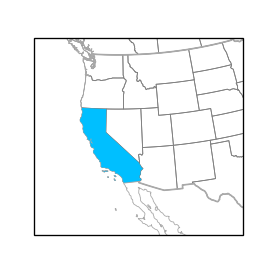

In [2]:
wl = warming_levels()
wl.choose_data()

In [3]:
my_lat, my_lon = 34.08214634521255, -117.2425643

A range that will result in the nearest gridcell being included:

In [4]:
wl.wl_params.latitude=(34.0,34.3)
wl.wl_params.longitude=(-117.5,-117.1)

And let's set a few other things for this example, in case we forget to do so above.

If you'd like to keep your parameters from the panel above, **do not run the below cell,** as this will overwrite your custom inputted parameters from above.

In [ ]:
wl.wl_params.variable="Maximum air temperature at 2m"
wl.wl_params.units="degF"
wl.wl_params.timescale="monthly"
wl.wl_params.downscaling_method="Dynamical"
wl.wl_params.resolution = '3 km'
wl.wl_params.anom="Yes"

#### 1b) Retrieve and process the data
The calculate step may take a while to complete depending on whether you selected `dynamical` (WRF) or `hybrid-statistical` (LOCA2-Hybrid) data for your analysis. Selecting statistical downscaling will take longer because there are more simulations to work with, and they are at the highest spatial resolution (~10-15min).

In [5]:
%%time
wl.calculate()

WARNING
-------
You have retrieved data for more than one SSP, but not all ensemble members for each GCM are available for all SSPs.

As a result, some scenario and simulation combinations may contain NaN values.

If you want to remove these empty simulations, it is recommended to first subset the data object by each individual scenario and then dropping NaN values.


Computing each warming level:   0%|          | 0/8 [00:00<?, ?it/s]

Processing data to read 5.62 KB of data into memory... 
[########################################] | 100% Completed | 2.83 sms
Complete!
Processing data to read 5.62 KB of data into memory... 
[########################################] | 100% Completed | 1.72 sms
Complete!
Processing data to read 5.62 KB of data into memory... 
[########################################] | 100% Completed | 1.62 sms
Complete!
Processing data to read 5.62 KB of data into memory... 
[########################################] | 100% Completed | 1.62 sms
Complete!
Processing data to read 5.62 KB of data into memory... 
[########################################] | 100% Completed | 1.62 sms
Complete!
Processing data to read 5.62 KB of data into memory... 
[########################################] | 100% Completed | 1.62 sms
Complete!
Processing data to read 3.38 KB of data into memory... 
[########################################] | 100% Completed | 1.01 sms
Complete!
Processing data to read 1.69 KB of data i

#### 1c) Visualize the regional response at a series of global warming levels
Use the drop down menu to visualize when a specified global warming level in reached for a scenario of interest. Scenarios shown are Shared Socioeconomic Pathways ([SSPs](https://www.sciencedirect.com/science/article/pii/S0959378016300681)): ranging from low (SSP 1-1.9) to high (SSP 5-8.5) emissions trajectories. This step is optional if you want to directly extract the data.

To learn more about the data available on the Analytics Engine, [see our data catalog](https://analytics.cal-adapt.org/data/). 

In [6]:
wl.visualize()

Loading in GWL snapshots...
Your data is already loaded into memory


Column
    [0] Card(collapsible=False, height=600, sizing_mode='fixed', styles={'header_background': 'lig...}, title='When do different s..., width=850)
        [0] Column
            [0] Markdown(str)
            [1] Select(description='Shared Socioeconomic P..., name='Scenario', options=OrderedDict({'All': 'All',...]), value='All', width=250)
            [2] ParamMethod(method, _pane=HoloViews, defer_load=False)
    [1] Card(collapsible=False, height=800, sizing_mode='fixed', styles={'header_background': 'lig...}, title='Regional response a..., width=850)
        [0] Row(width=230)
            [0] StaticText(value='Warming level (°C)')
            [1] RadioButtonGroup(description='Warming level i..., options=OrderedDict({'1.5': 1.5, ...]), value=1.5)
        [1] Tabs(dynamic=True)
            [0] Column
                [0] StaticText(value="Panels show the 30-year a..., width=800)
                [1] ParamMethod(method, _pane=Row, defer_load=False)
            [1] Column
                [0] StaticText(value='Panels show the median, ..., width=800)
                [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

If you want to extract the data from within the figure above, you can use the `gwl_snapshots` variable below.. With this variable, you can examine the data being plotted above and plot it in a different way, or save it out. 

In [7]:
regional_response = wl.gwl_snapshots

#### 1d) Extract slices of data centered on the selected warming level

In [8]:
data_at_warming_level = wl.sliced_data

**Optional:** Get a feel for how the data is stored, by looking at timeseries for a single grid cell. The 30-year slice is different for each simulation, with some that reach the warming level sooner or later that others.

In [9]:
if wl.wl_params.downscaling_method == 'Dynamical':
    out = data_at_warming_level['2.0'].mean(['x','y']).squeeze().to_pandas()
else:
    out = data_at_warming_level['2.0'].mean(['lat','lon']).squeeze().to_pandas()

<Axes: xlabel='months_from_center'>

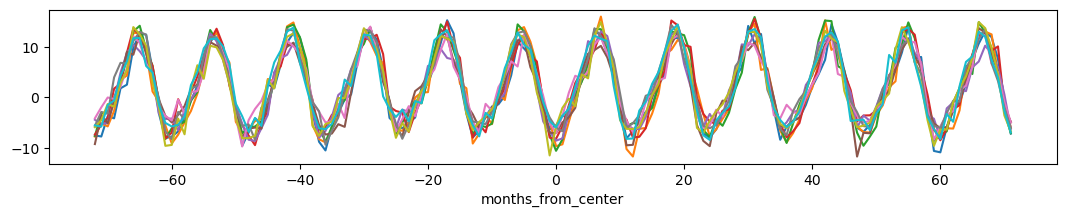

In [10]:
out.plot.line(legend=None,figsize=[13,2])

## Step 2: Application

#### 2a) Select data
Prepare a map of the changes for a day and time when the largest temperature increases are projected, and overlay the locations of California [power plants](https://cecgis-caenergy.opendata.arcgis.com/datasets/CAEnergy::california-power-plants/explore?location=37.174065,-118.394256,6.93) and [substations](https://cecgis-caenergy.opendata.arcgis.com/datasets/CAEnergy::california-electric-substations/explore?location=37.225884,-119.175779,6.93) on the map to identify vulnerable assets.

We'll start by retrieving some data, making sure that it is hourly time-resolution.

Card(collapsible=False, styles={'header_background': 'lig...}, title='Choose Data t..., width=600)
    [0] Column
        [0] Row
            [0] Column(width=270)
                [0] StaticText(name='Downscaling Method')
                [1] RadioBoxGroup(name='Downscaling method', options=OrderedDict({'Dynamical': ...]), value='Dynamical')
            [1] Column(width=120)
                [0] StaticText(styles={'color': 'red'})
        [1] Row
            [0] Column(width=250)
                [0] StaticText(name='Variable Type')
                [1] Select(options=OrderedDict({'Air Temperat...]), value='Air Temperature at 2m', width=225)
                [2] StaticText(value='Temperature o...)
                [3] StaticText(name='Variable Units')
                [4] RadioBoxGroup(name='Units', options=OrderedDict({'K': 'K', ...]), value='K')
                [5] StaticText(name='Timescale')
                [6] RadioBoxGroup(options=OrderedDict({'daily': 'dai...]), value='monthly')
                [7] StaticText(name='Model Grid-Spacing')
                [8] RadioBoxGroup(name='Resolution', options=OrderedDict({'3 km': '3 km...]), value='45 km')
            [1] Column(width=220)
                [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                [1] Select(name='Subset the data by...', options=OrderedDict({'none': 'none...]), value='states', width=225)
                [2] MultiSelect(name='Location selection', options=OrderedDict({'CA': 'CA', ...]), value=['CA'], width=225)
                [3] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5)
                [4] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5)
        [2] Row
            [0] Column(width=250)
                [0] StaticText(value='Years around G...)
                [1] IntSlider(end=25, start=5, value=15)
            [1] Column(width=220)
                [0] StaticText(value='Return a delta s...)
                [1] RadioBoxGroup(inline=True, options=OrderedDict({'Yes': 'Yes',...]), value='Yes')
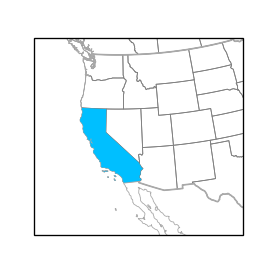

In [11]:
wl2 = warming_levels()
wl2.choose_data()

We provide some recommended options below, by focusing over the whole state of California. Then we will prepare and process the data by running the `calculate()` function.

In [ ]:
wl2.wl_params.downscaling_method = 'Dynamical'
wl2.wl_params.timescale = 'hourly'
wl2.wl_params.resolution = '45 km'
wl2.wl_params.variable = 'Air Temperature at 2m'
wl2.wl_params.units = 'degF'

Because we are looking at hourly data across the state of California, the following calculate step will take a while to load. On default settings, you should expect the entire function to take ~12 min.

In [ ]:
wl2.calculate()

Select a global warming level of interest. We default to 2°C here, but common options for representing global warming levels are: 1.5°C, 2°C, 3°C, and 4°C.

In [ ]:
my_gwl = '2.0'  # global warming level in degC

In [ ]:
my_data = wl2.catalog_data

Here we select a particular day of the year and time of day to investigate:

In [ ]:
one_day = my_data.isel(time=(my_data.time.dt.dayofyear == 216))
one_hour = one_day.isel(time=(one_day.time.dt.hour == 23))

In [ ]:
from climakitae.explore.warming import get_sliced_data
from climakitae.util.utils import read_csv_file
from climakitae.core.paths import gwl_1981_2010_file

gwl_lookup = read_csv_file(gwl_1981_2010_file, index_col=[0, 1, 2])
to_plot = one_hour.groupby('all_sims').apply(get_sliced_data, level=my_gwl, years=gwl_lookup,window=wl2.wl_params.window)

And format the information to be plotted for a given warming level:

In [ ]:
to_plot = to_plot.mean('time')
to_plot.name = 'degrees warmer'

Force the data to be computed and ready to plot. This may take a minute.

In [ ]:
to_plot = ck.load(to_plot)

Next, we'll load data that contains locations of power plants to visualize against the regional warming response.

In [ ]:
import geopandas as gpd

# URLs to shapefiles for example point data from CEC (power plants and substations available)
URLs = {
    'power_plants' : "https://opendata.arcgis.com/api/v3/datasets/4a702cd67be24ae7ab8173423a768e1b_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1",
    'substations' : "https://cecgis-caenergy.opendata.arcgis.com/datasets/CAEnergy::california-electric-substations.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
}

# Download the desired data
power_plants = gpd.read_file(URLs['power_plants']).rename(columns = {'Lon_WGS84':'lon', 'Lat_WGS84':'lat'})

We'll also clean up the data a bit before visualizing it.

In [ ]:
## Light data cleaning of simulation names to be readable for the following visualization

# Modifying all_sims variable to be more readable for plotting
ssps = [scenario_name.split('+')[1].split('--')[0].strip() for scenario_name in to_plot.scenario.values]
to_plot['all_sims'] = ['\n'.join(title) for title in list(zip(to_plot.simulation.values, ssps))]

# Dropping simulations that are all NaNs
valid_plots = to_plot.dropna(dim='all_sims', how='all')

Finally, prepare the map, and display it with power plant locations overlaid. 

In [ ]:
# Plot maps of power plant locations over warmings of gridcells
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from climakitae.util.colormap import read_ae_colormap
cmap = read_ae_colormap(cmap='ae_diverging', cmap_hex=False)

gridded = valid_plots.plot.pcolormesh(x='lon',y='lat', col='all_sims', col_wrap=4, figsize=(12, 9),
                     transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Orthographic(-100,40)},
                     cbar_kwargs={"location": "right", "shrink": 0.7})

for ax, title in zip(gridded.axes.flat, valid_plots.all_sims.values):
    ax.set_extent([-122.5, -115, 32, 43], crs=ccrs.PlateCarree())
    ax.set_title(title)
    ax.coastlines()
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.scatter(power_plants.geometry.x, power_plants.geometry.y, transform=ccrs.PlateCarree(), s=0.2, c='k')

## Step 3: Export

To save data as a file, call `export` and provide the following:
1) data to export – an [xarray DataArray or Dataset](https://docs.xarray.dev/en/stable/user-guide/data-structures.html), as output by either the  `gwl_snapshots()` or `sliced_data()` functions on any warming levels object
2) output file name (without file extension)
3) file format ("NetCDF" or "CSV")

To learn more about the file format options, see [getting_started.ipynb](getting_started.ipynb).

In [ ]:
ck.export(regional_response, "my_filename", "NetCDF")